# Multiple Linear Regression

Multiple Variables that need to be analyzed can be through multiple linear regression analysis. Instead of y = mx +c, we have several in/dependent variables tested but always only one constant, c, y-intercept

In [48]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd

In [49]:
orders = pd.read_csv('./Algorithms/data/orders.csv')
orders.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [50]:
orders.shape

(9994, 21)

In [51]:
orders["category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: category, dtype: int64

In [52]:
orders.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Find the Correlation

<AxesSubplot:>

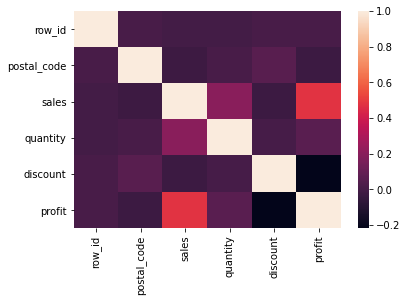

In [53]:
#since we dont know yet which factors correlate, we will use a correlation matrix before using regression analysis

sns.heatmap(orders.corr())

# Basic Linear Regression

Kein Testen und Trainieren, eine reine visualisierung ohne predictive fähigkeiten

In [54]:
X = orders[["profit"]]
y = orders[["sales"]]

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [57]:
y_pred = regressor.predict(X)

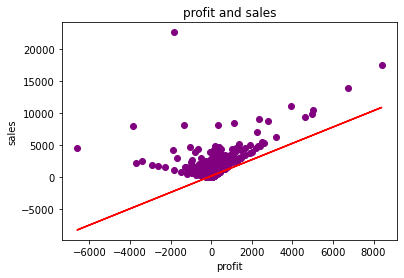

In [58]:
plt.scatter(X, y, color = 'purple')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('profit and sales')
plt.xlabel('profit')
plt.ylabel('sales')
plt.show()

# Evaluating the Linear Regression Model

In [59]:
#encoding categorial data (hast du nicht, aber falls du mal brauchst)
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 5] = labelencoder.fit_transform(X[:, 5])
#die daten umwandeln in ein array
#onehotencoder = OneHotEncoder(categorial_features = [5])
#X = onehotencoder.fit_transform(X).toarray()

#avoiding dummy variable trap, header raus
#X = X[:, 1:]

Einteilen in Test und Training Daten

In [66]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd

In [67]:
orders = pd.read_csv('./Algorithms/data/orders.csv')
orders.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [68]:
X = orders[["profit"]]
y = orders[["sales"]]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [71]:
#predicting test set reslts
y_pred = regressor.predict(X_test)
y_pred

array([[208.22022167],
       [205.75245211],
       [196.69912044],
       ...,
       [248.38157178],
       [200.6741642 ],
       [209.72010351]])

In [73]:
#c
regressor.coef_

array([[1.27454269]])

In [75]:
#mx
regressor.intercept_

array([193.333563])

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #36,6 korrektes model, also ziemlich falsch

0.3661804490897229